# Plot clustermap of Diamond output for GH7 100 sequences
## Ran at fast, mid-sensitive and sensitive

## Imports

In [1]:
import seaborn as sns
import pandas as pd
import numpy as np

## Function to create clustermap

/home/cjohns/.local/lib/python3.6/site-packages/seaborn/matrix.py:654: UserWarning: Clustering large matrix with scipy. Installing `fastcluster` may give better performance.
  warnings.warn(msg)


Help on function plotdiamond in module __main__:

plotdiamond(nseqs, speed)
    Function takes the output matrix calculated by diamond and plots them as a cluster map for a 
    specified number of sequences (nseqs) and speed (speed).



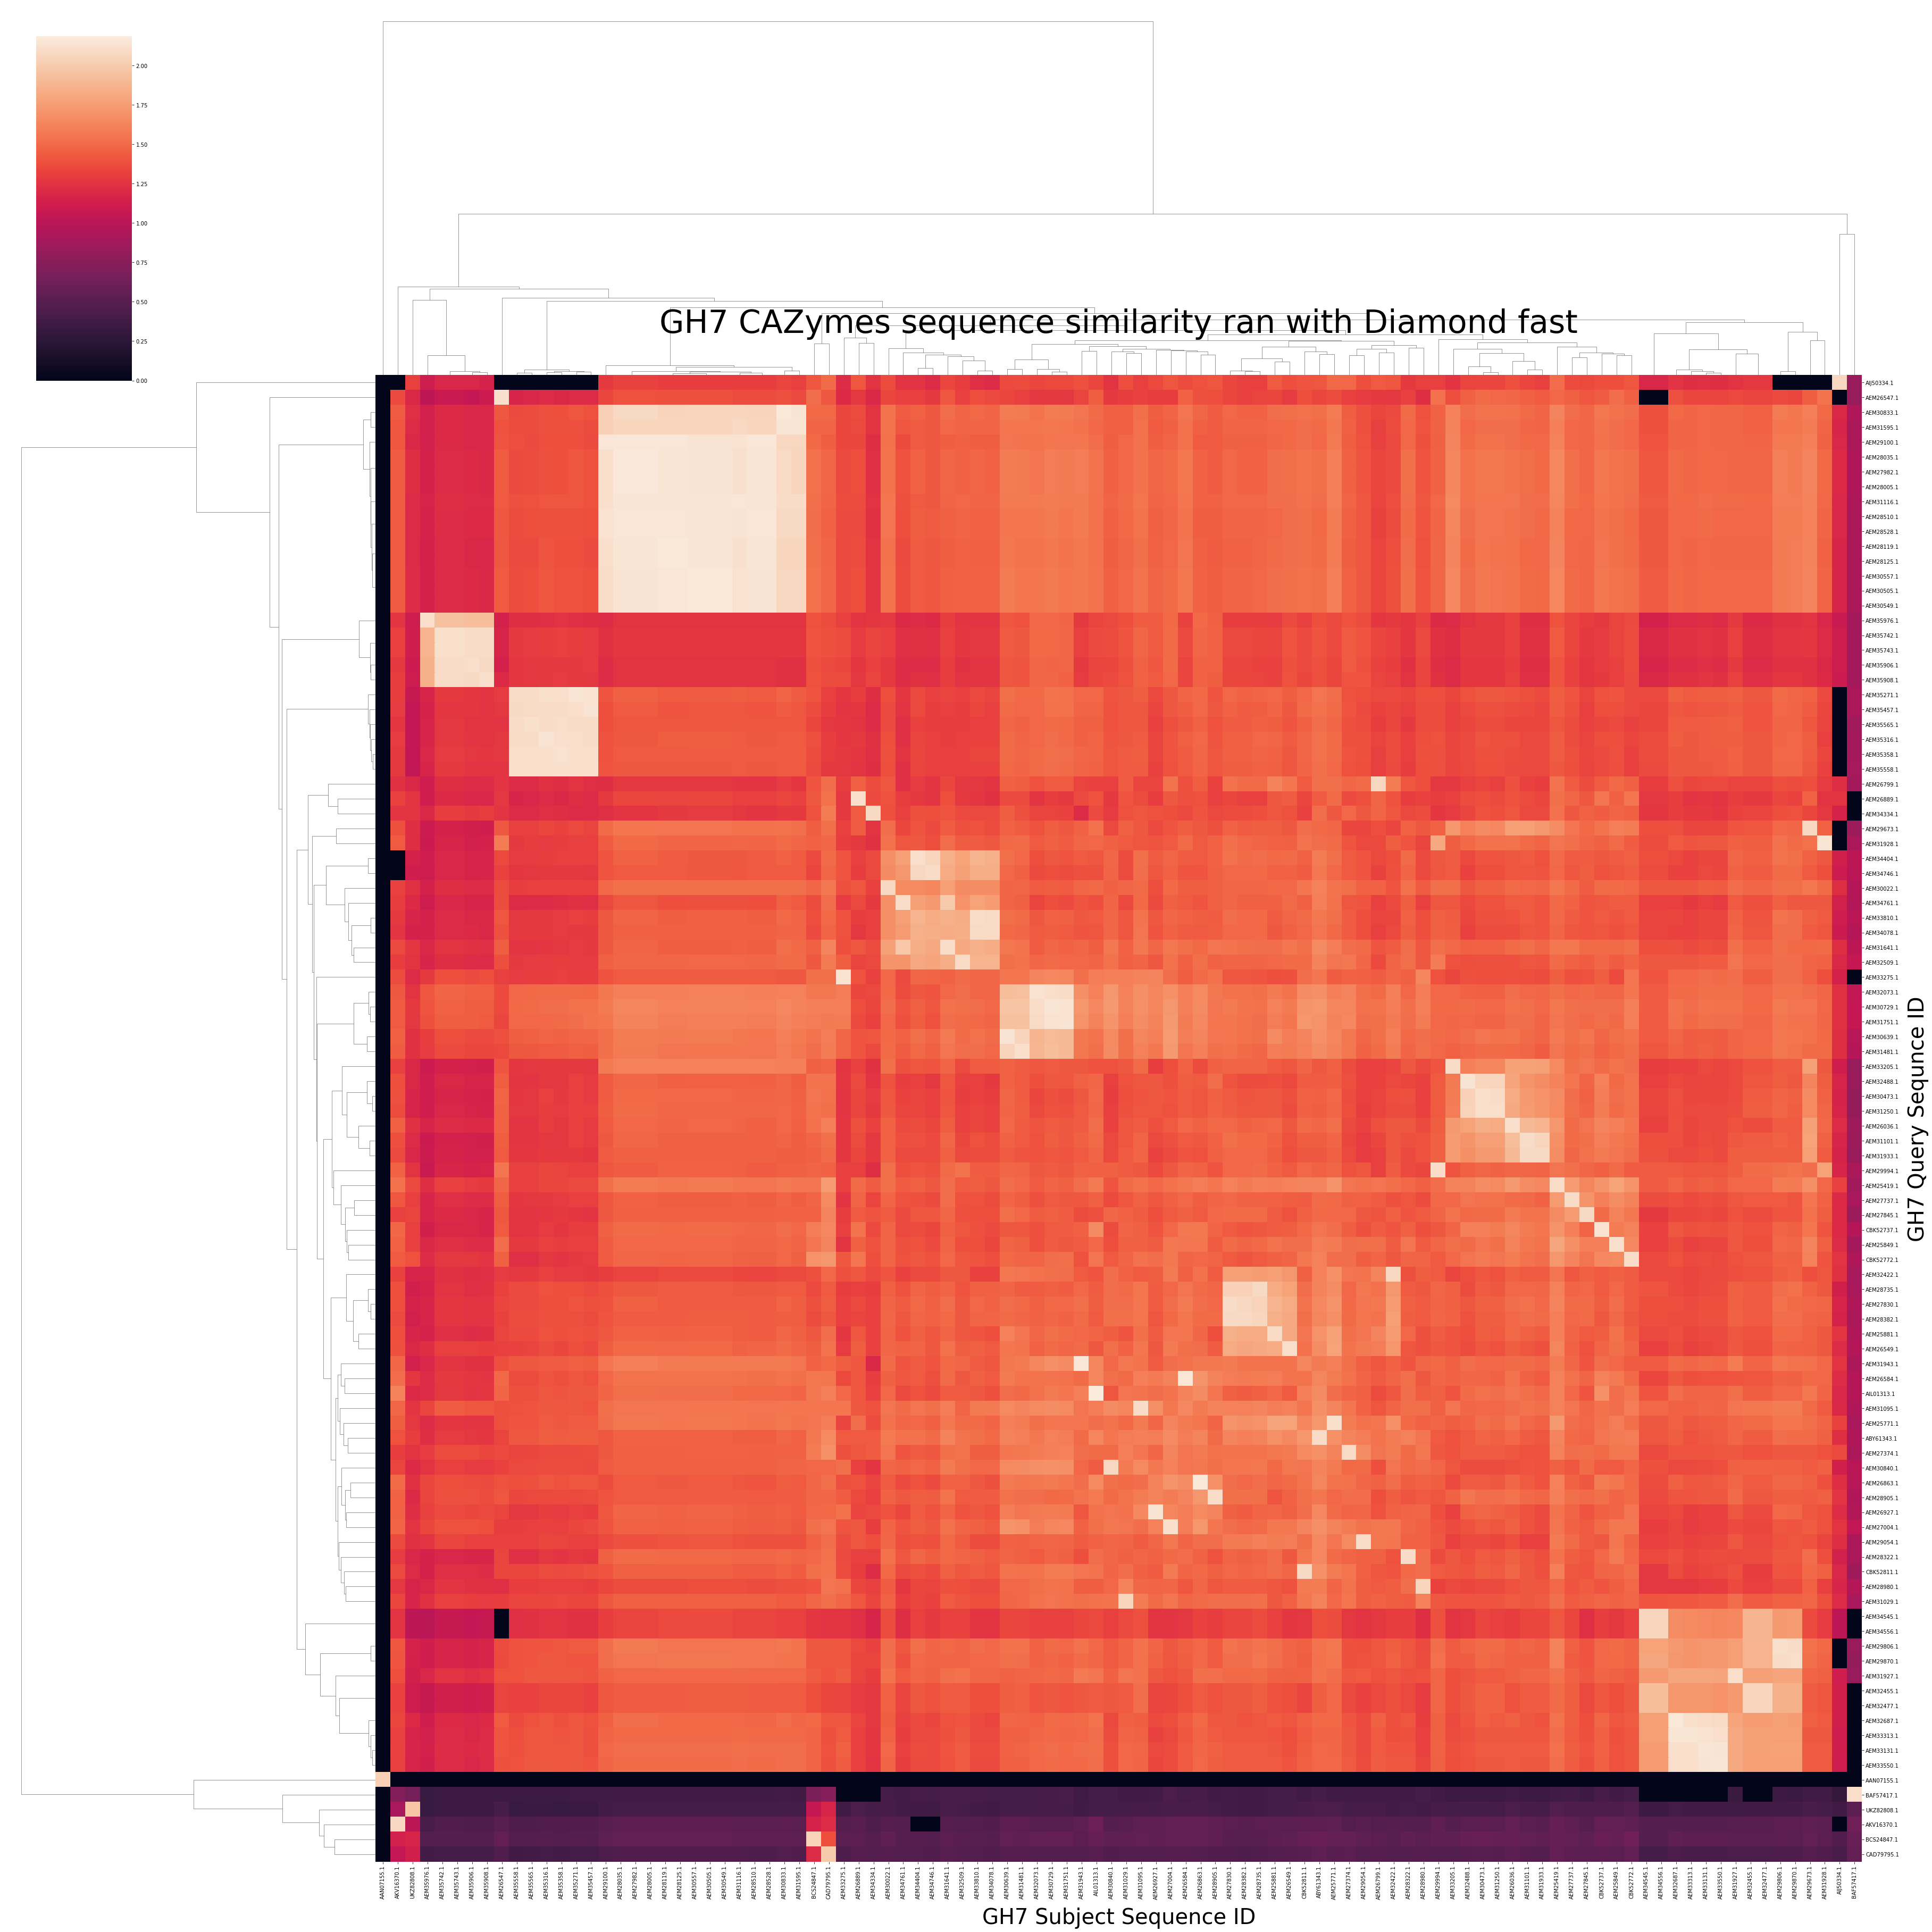

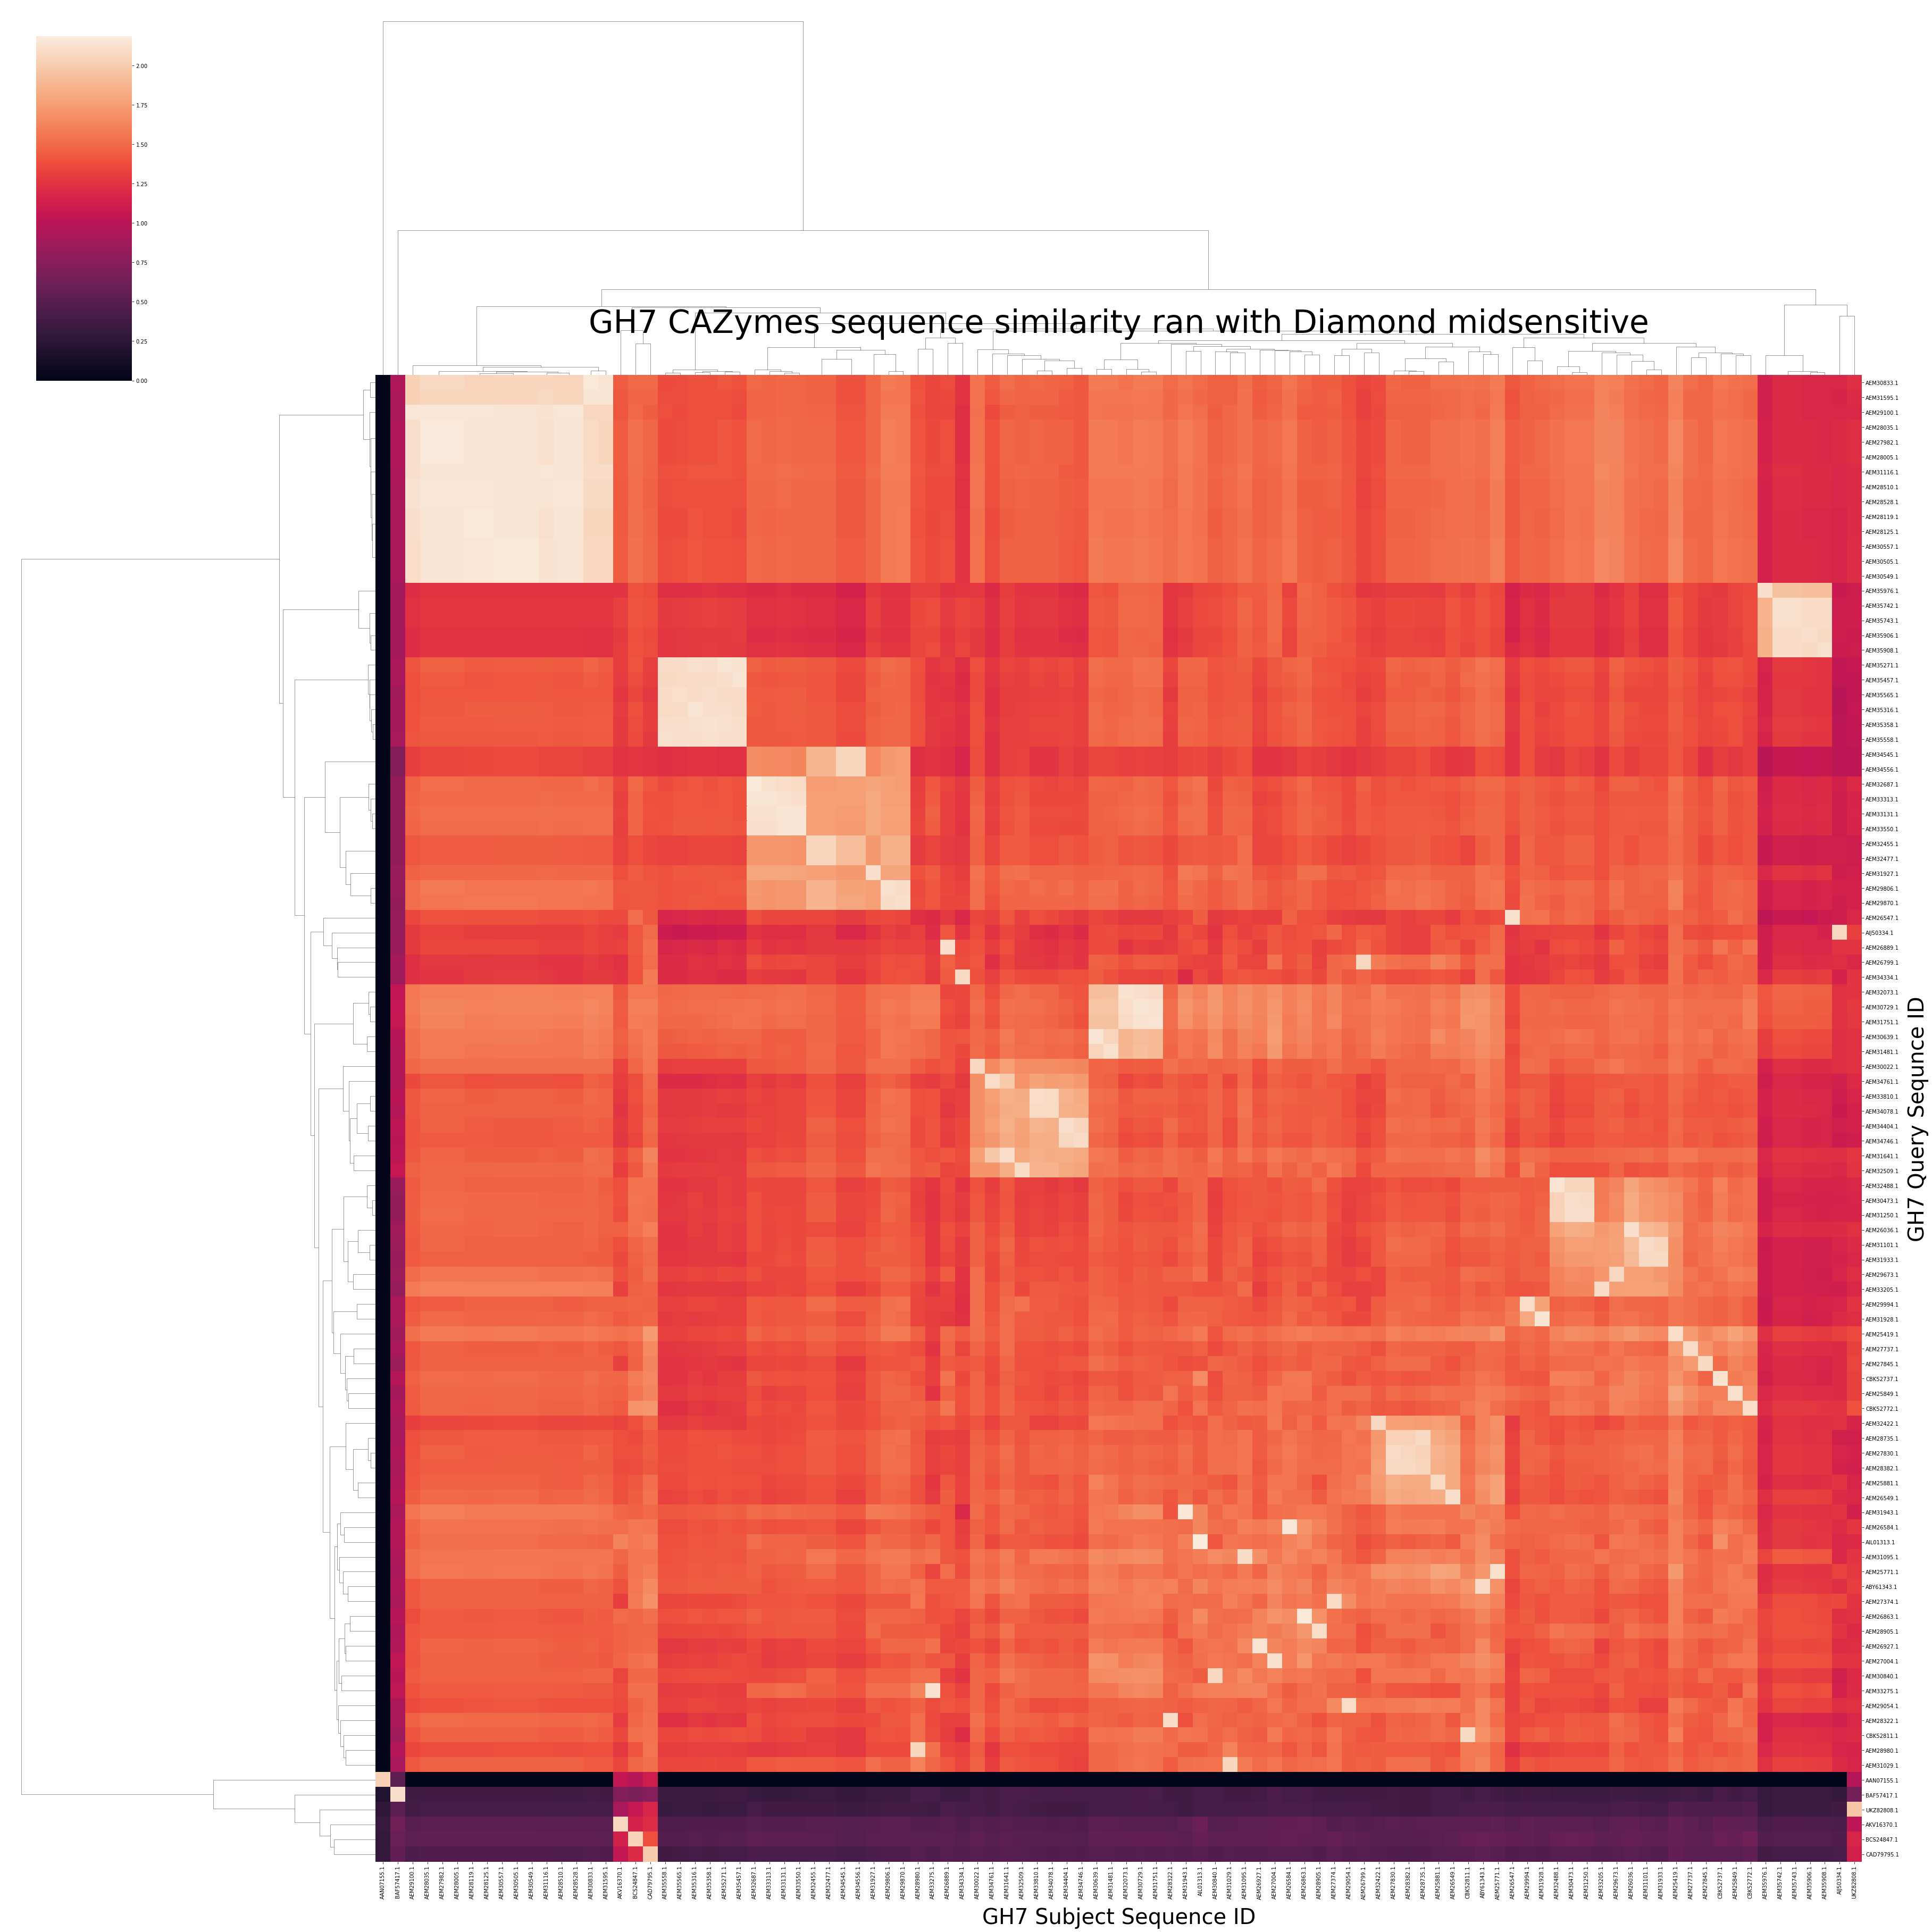

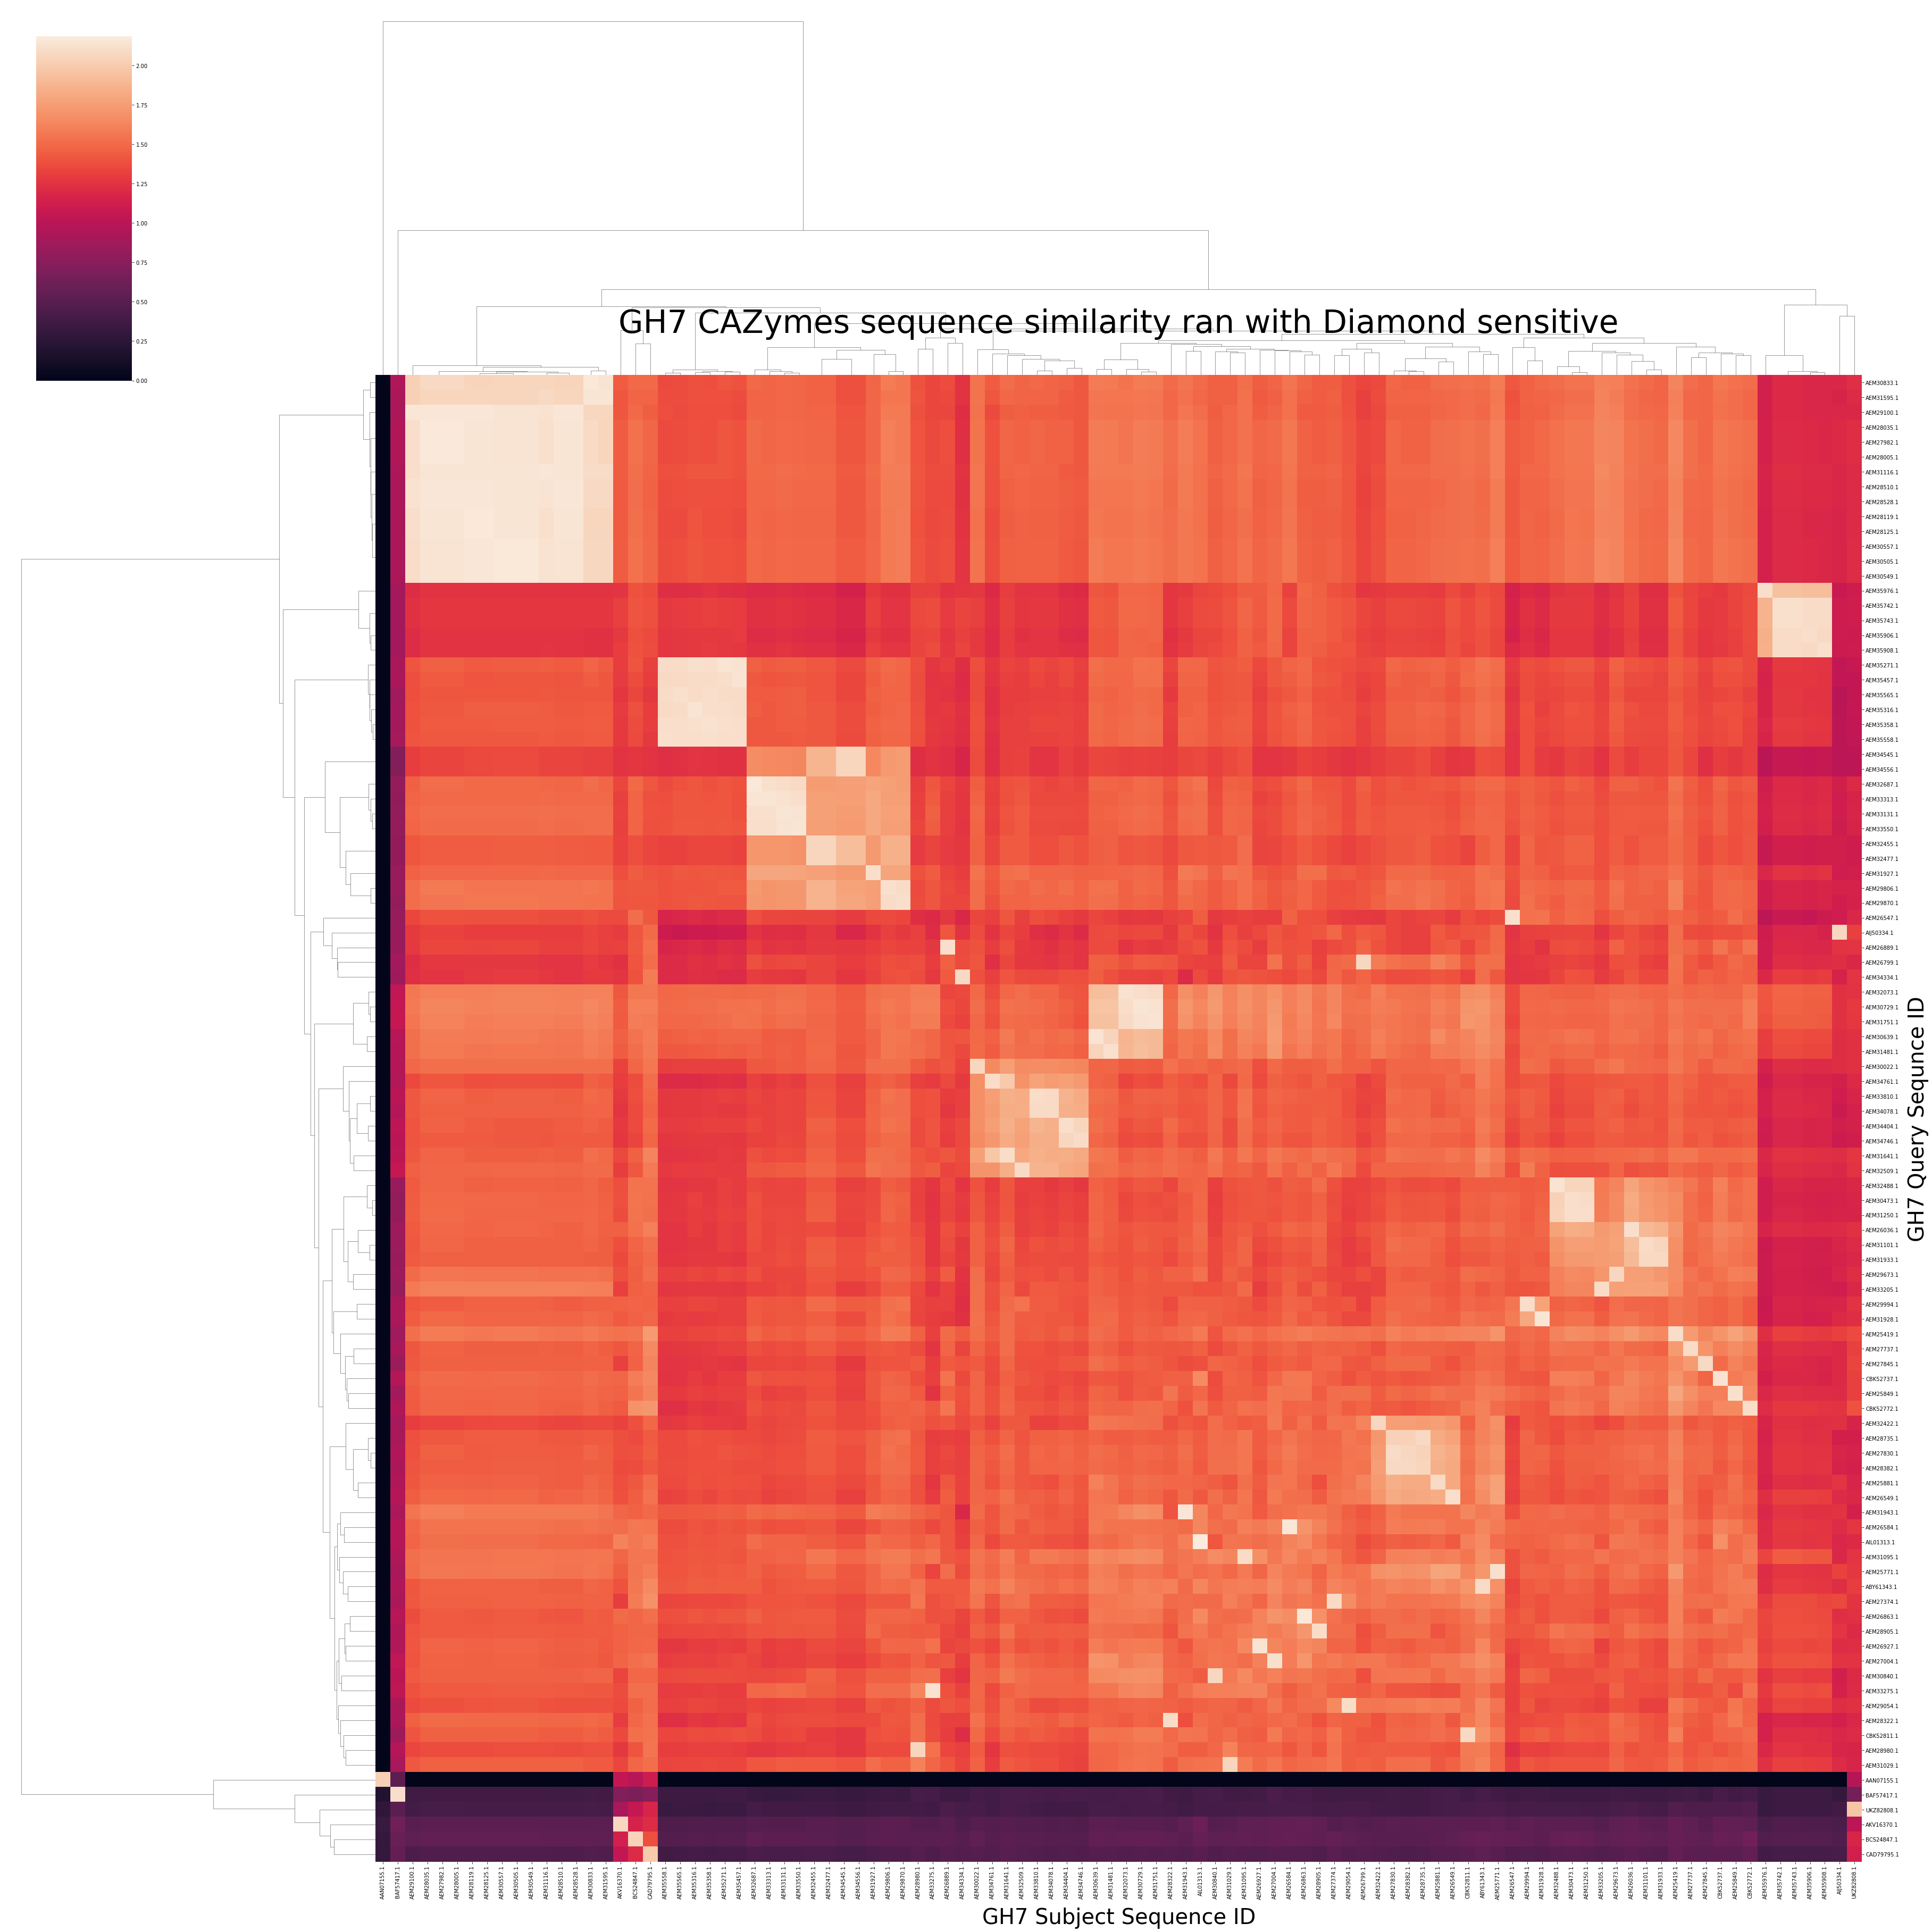

In [2]:
def plotdiamond(nseqs, speed): # Function is called plotdiamond.
    """Function takes the output matrix calculated by diamond and plots them as a cluster map for a 
    specified number of sequences (nseqs) and speed (speed). """
    infile = f"../Results/Diamond_out/{nseqs}rundiamond{speed}.tsv" 
    # Set correct file with desired number of sequences and speed to variable infile.

    df = pd.read_table(infile, header=None) # Create a dataframe.
    df.columns = ["qseqid", "sseqid", "qlen", "bitscore"] # Name the columnes in the dataframe.
    df["normalisedbitscore"]=df["bitscore"]/df["qlen"] # Caculate the normalised bitscore.
    df = df.drop(["qlen", "bitscore"],axis=1) # Remove uneeded columnes.

    widedfx = pd.pivot(df, index="qseqid", columns= "sseqid", values="normalisedbitscore") 
    # Turn Long dataframe into a wide dataframe.
    widedf = widedfx.fillna(0) # Remove any values NaN and replace with 0.

    figure=sns.clustermap(widedf, cmap="rocket", figsize=(50, 50)); # Plot clustermap of the data frame created.
    figure.ax_heatmap.set_xlabel("GH7 Subject Sequence ID",fontsize=40, labelpad=15)
    figure.ax_heatmap.set_ylabel("GH7 Query Sequnce ID",fontsize=40, labelpad=15)
    figure.ax_heatmap.set_title(
        f'GH7 CAZymes sequence similarity ran with Diamond {speed}',
        fontsize=60, 
        pad=80
    )
    figure.savefig(f'../Results/Diamond_out/{nseqs}_diamond_{speed}.png') # Save in results folder.
    
plot = plotdiamond(100, 'fast') # Run function for 100 sequences at fast
plot = plotdiamond(100, 'midsensitive')
plot = plotdiamond(100, 'sensitive')

help(plotdiamond) # Call functions doc string to explain what the function does.